In [31]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt

# Question 1

In [33]:
class RegularPolygon:
    def __init__(self, n, s):
        if n < 3:
            print("Cannot form a polygon with less than 2 sides.")
            return
        self.n = n
        self.s = s
        

    def perimeter(self):
        return self.n * self.s

    def area(self):
        return (self.n * self.s**2) / (4 * np.tan(np.pi / self.n))

    def angle(self):
        return (self.n - 2) * np.pi / self.n

    def plot(self):
        myangles = np.linspace(0, 2 * np.pi, self.n + 1)
        myradii = np.ones(self.n + 1)
        ax = plt.subplot(projection='polar')
        ax.plot(myangles, myradii) # The variables represent theta and r, not x and y
        ax.axis('off') # Try it without this to see the effect
        plt.title(f'Regular Polygon with {self.n} sides')
        plt.show()

10
6.881909602355868
1.8849555921538759


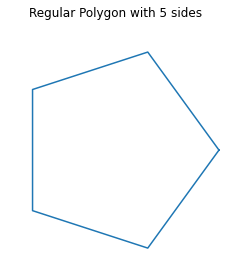

In [34]:

polygon = RegularPolygon(5, 2)
print(polygon.perimeter())
print(polygon.area())
print(polygon.angle())
polygon.plot()

# Question 2

In [35]:
x = np.linspace(0,5,6)
y = np.linspace(0,5,6)

In [36]:
xv, yv = np.meshgrid(x,y)

In [37]:
def f(xv,yv):
    return xv**2 - 6*xv + yv**2 - 4*yv + 13

In [38]:
#minimum of this function is at (3,2)

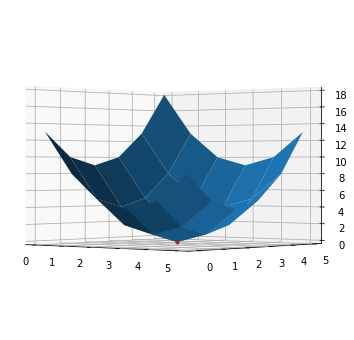

In [39]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection = '3d')

ax.plot_surface(xv, yv, f(xv,yv))
plt.plot(3, 2, 0, marker="o", markersize=3, color="red") #minimum plotted on the graph
ax.view_init(0,-50,0)
plt.show()

In [40]:
def gradescent (point, n, eta):
    for _ in range (n):
        point[0] = point[0]  -(eta* (2*(point[0])-6))
        point[1] = point[1]  -(eta* (2*(point[1])-4))
        print(point)
    return point 

In [41]:
gradescent([2,4], 10 ,0.9)

[3.8, 0.3999999999999999]
[2.3600000000000003, 3.2800000000000002]
[3.5119999999999996, 0.9759999999999995]
[2.5904000000000003, 2.8192000000000004]
[3.32768, 1.3446399999999996]
[2.737856, 2.5242880000000003]
[3.2097152, 1.5805695999999996]
[2.83222784, 2.3355443200000003]
[3.1342177280000003, 1.7315645439999998]
[2.8926258176, 2.2147483648]


[2.8926258176, 2.2147483648]

In [42]:
gradescent([2,4], 10 ,0.3)

[2.6, 2.8]
[2.84, 2.32]
[2.936, 2.128]
[2.9744, 2.0512]
[2.98976, 2.02048]
[2.995904, 2.008192]
[2.9983616, 2.0032768]
[2.99934464, 2.00131072]
[2.999737856, 2.0005242880000003]
[2.9998951423999998, 2.0002097152]


[2.9998951423999998, 2.0002097152]

# Question 3

In [43]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [45]:
mydata = np.genfromtxt('CS323/jan8separate.csv', delimiter=',')

FileNotFoundError: CS323/jan8separate.csv not found.

In [ ]:
X= mydata[:,0:3]
y = mydata[:,2]

In [ ]:
y = np.where(y <= 0, 0, 1)

In [ ]:
mymodel =Perceptron(.5, 20)
myfittedmodel = mymodel.fit(X,y)
myfittedmodel.predict(X)

In [ ]:
myfittedmodel.predict([1,-4,0])

In [ ]:
np.count_nonzero(myfittedmodel.predict(X) - y)